# <center> **PROJECT. Классификация мужчин и женщин по голосу.**
![Alt text](image.png)

## <center> **`1.` Постановка задачи**

**Цель работы:**

В данной работе необходимо обучить модель машинного обучения классифицировать людей на мужчин и женщин по их голосу.

### <center> **Организационная информация**

Проект будет состоять из четырёх частей:

**`1.` Постановка задачи**;

**`2.` Исследование данных**;

**`3.` Разведывательный анализ данных (EDA)**;

**`4.` Построение и сравнение моделей (Machine Learning)**.

## <center> **`2.` Исследование данных**

Импортируем необходимые библиотеки:

In [1]:
# Для работы с данными
import pandas as pd
import numpy as np

# Для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Для построения модели
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

Прочитаем данные:

In [2]:
# Загружаем DataFrame
voice_data = pd.read_csv('Прочие файлы/voice_gender.csv')

# Создаём копию
voice_df = voice_data.copy()

In [ ]:
# Выведем первые пять строк
voice_df.head()

### <center> **Иформация о датасете**

Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин.

* `meanfreq` — средняя частота голоса спикера (в кГц);
* `sd` — стандартное отклонение частоты (в кГц);
* `median` — медианная частота (в кГц);
* `Q25` — первый квартиль частоты (25-я квантиль) (в кГц);
* `Q75` — третий квартиль частоты (75-я квантиль) (в кГц);
* `IQR` — межквартильный размах (Q75-Q25) (в кГц);
* `skew` — асимметрия распределения частот;
* `kurt` — эксцесс распределения частот;
* `sp.ent` — спектральная энтропия;
* `sfm` — спектральная равномерность;
* `mode` — модальная частота (наиболее популярная частота голоса);
* `centroid` — частотный центроид;
* `meanfun` — среднее значение основной частоты, измеренной по акустическому сигналу;
* `minfun` — минимальное значение основной частоты, измеренной по акустическому сигналу;
* `maxfun` — максимальное значение основной частоты, измеренной по акустическому сигналу;
* `meandom` — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
* `mindom` — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* `maxdom` — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* `dfrange` — диапазон доминирующей частоты, измеренный по акустическому сигналу;
* `modindx` — индекс модуляции;
* `label` — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

Посмотрим на типизацию признаков:

In [12]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Итак, все признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке *sklearn*, поэтому кодирование категориальных признаков нам не потребуется.

Заодно проверим данные на наличие пропусков:

In [3]:
# Выводим суммарное количество пропусков
print('Суммарное количество пропусков в данных: {}'.format(voice_df.isnull().sum().sum()))

# Выводим количество пропусков по столбцам
voice_df.isnull().sum()

Суммарное количество пропусков в данных: 0


meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Общее количество пропусков в датасете равно 0. Значит, обработка пропущенных значений нам не потребуется.

## <center> **`3.` Разведывательный анализ данных (EDA)**

#### $3.1$

Построим зависимость голоса принадлежности (мужчина, женщина) от средней частоты.

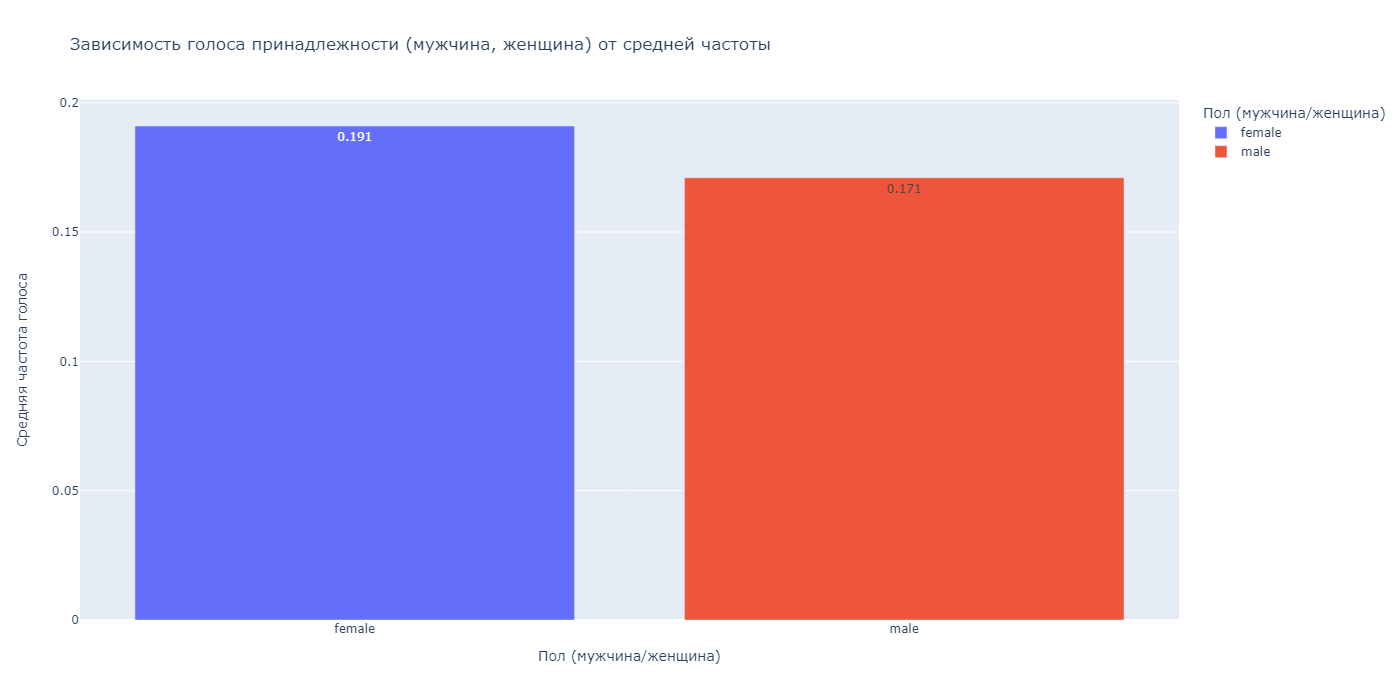

Средняя частота голоса у мужчин: 0.171 кГц
Средняя частота голоса у женщин: 0.191 кГц


In [68]:
# Создаём DataFrame, в котором отразим зависимость голоса от средней частоты
meanfreq_group = voice_df.groupby(
    by = 'label',
    as_index = False
)[['meanfreq']].mean().round(3)


# Строим диаграмму
fig = px.bar(
    data_frame = meanfreq_group,                # DataFrame
    x = 'label',                                # распределение по оси x
    y = 'meanfreq',                             # распределение по оси y
    color = 'label',                            # цвет столбцов
    height = 700,                               # высота
    width = 1400,                               # ширина
    text = 'meanfreq',                          # текст на столбцах
    
    labels = {
        'label': 'Пол (мужчина/женщина)',       # название по оси x
        'meanfreq': 'Средняя частота голоса'    # название по оси y
    },
    
    title = 'Зависимость голоса принадлежности (мужчина, женщина) от средней частоты'  # название графика 
)

# Выводим график
fig.show('png')


# Выводим значения
print('Средняя частота голоса у мужчин: {:.3f} кГц'.format(meanfreq_group.meanfreq[1]))
print('Средняя частота голоса у женщин: {:.3f} кГц'.format(meanfreq_group.meanfreq[0]))

#### $3.2$

Построим зависимость голоса принадлежности (мужчина, женщина) от диапазона доминирующей частоты, измеренного по акустическому сигналу

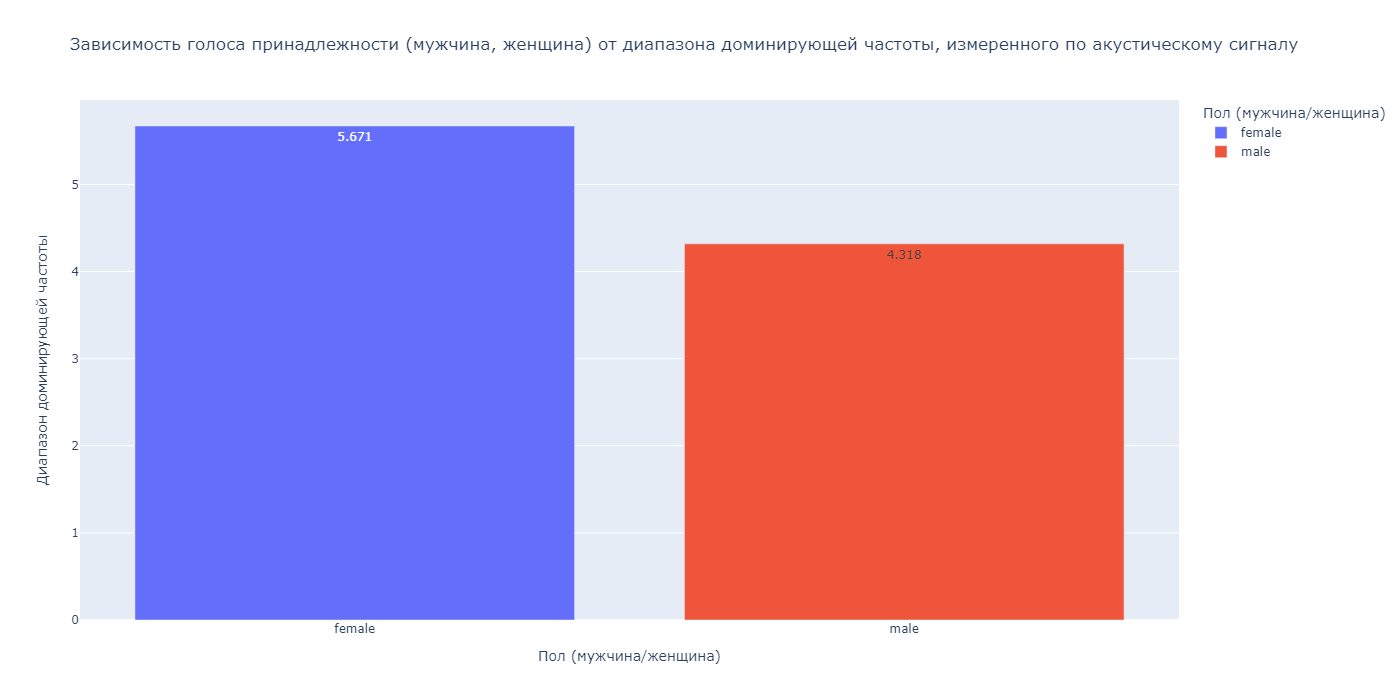

Диапазон частоты у мужчин: 4.318
Диапазон частоты у женщин: 5.671


In [71]:
# Создаём DataFrame, в котором отразим зависимость голоса 
# от среднего диапазона доминирующей частоты, измеренного по акустическому сигналу
dfrange_group = voice_df.groupby(
    by = 'label',
    as_index = False
)[['dfrange']].mean().round(3)


# Строим диаграмму
fig = px.bar(
    data_frame = dfrange_group,
    x = 'label',
    y = 'dfrange',
    color = 'label',
    height = 700,
    width = 1400,
    text = 'dfrange',
    
    labels = {
        'label': 'Пол (мужчина/женщина)',
        'dfrange': 'Диапазон доминирующей частоты'
    },
    
    title = 'Зависимость голоса принадлежности (мужчина, женщина) от диапазона доминирующей частоты, измеренного по акустическому сигналу'
)

# Выводим график
fig.show('png')


# Выведем значения
print('Диапазон частоты у мужчин: {}'.format(dfrange_group.dfrange[1]))
print('Диапазон частоты у женщин: {}'.format(dfrange_group.dfrange[0]))

#### $3.3$

Построим зависимость голоса принадлежности (мужчина, женщина) от медианной частоты (кГц).

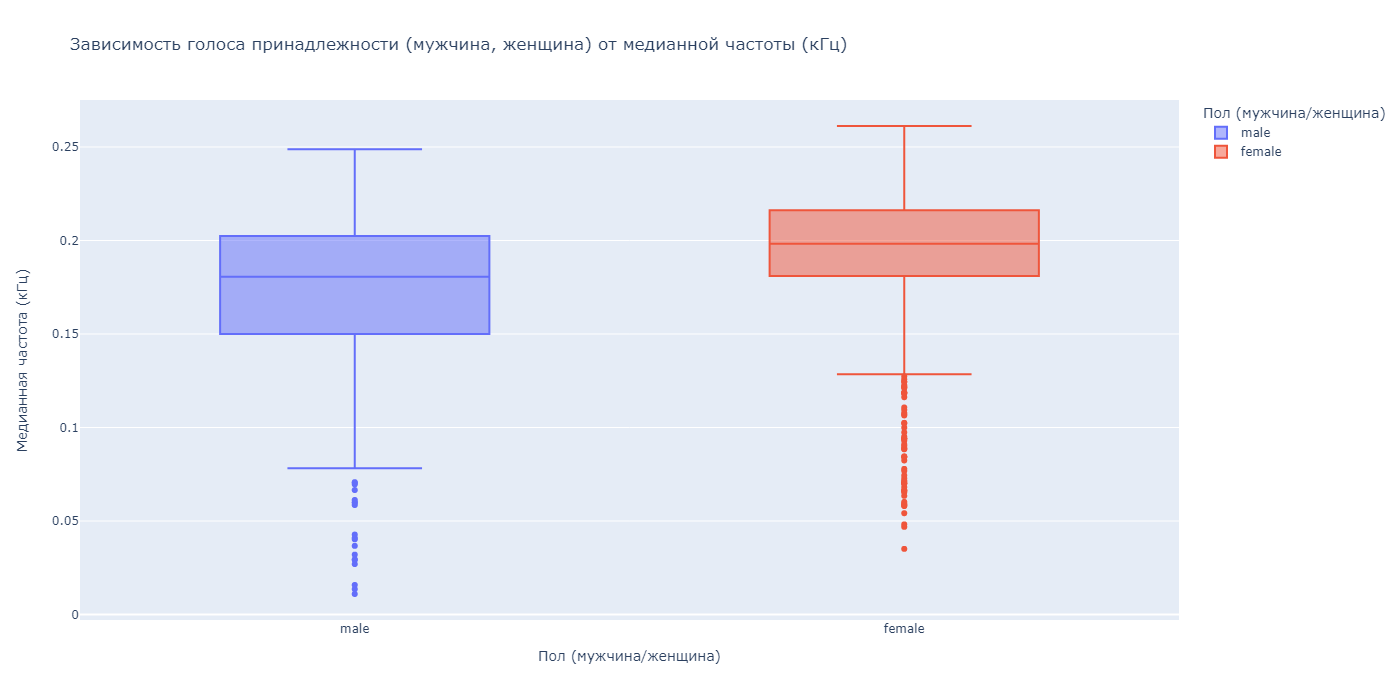

Медианная частота голоса у мужчин: 0.181 кГц
Медианная частота голоса у женщин: 0.198 кГц


In [56]:
# Строим диаграмму
fig = px.box(
    data_frame = voice_df,
    x = 'label',
    y = 'median',
    color = 'label',
    height = 700,
    width = 1400,
    orientation = 'v',
    
    labels = {
        'label': 'Пол (мужчина/женщина)',
        'median': 'Медианная частота (кГц)'
    },
    
    title = 'Зависимость голоса принадлежности (мужчина, женщина) от медианной частоты (кГц)'
)

# Выводим график
fig.show('png')


# Выведем значения 
median_group = voice_df.groupby(
    by = 'label',
    as_index = False
)[['median']].median()

print('Медианная частота голоса у мужчин: {:.3f} кГц'.format(median_group['median'][1]))
print('Медианная частота голоса у женщин: {:.3f} кГц'.format(median_group['median'][0]))

#### $3.4$

Построим зависимость голоса принадлежности (мужчина, женщина) от среднего значения доминирующей частоты, измеренной по акустическому сигналу.

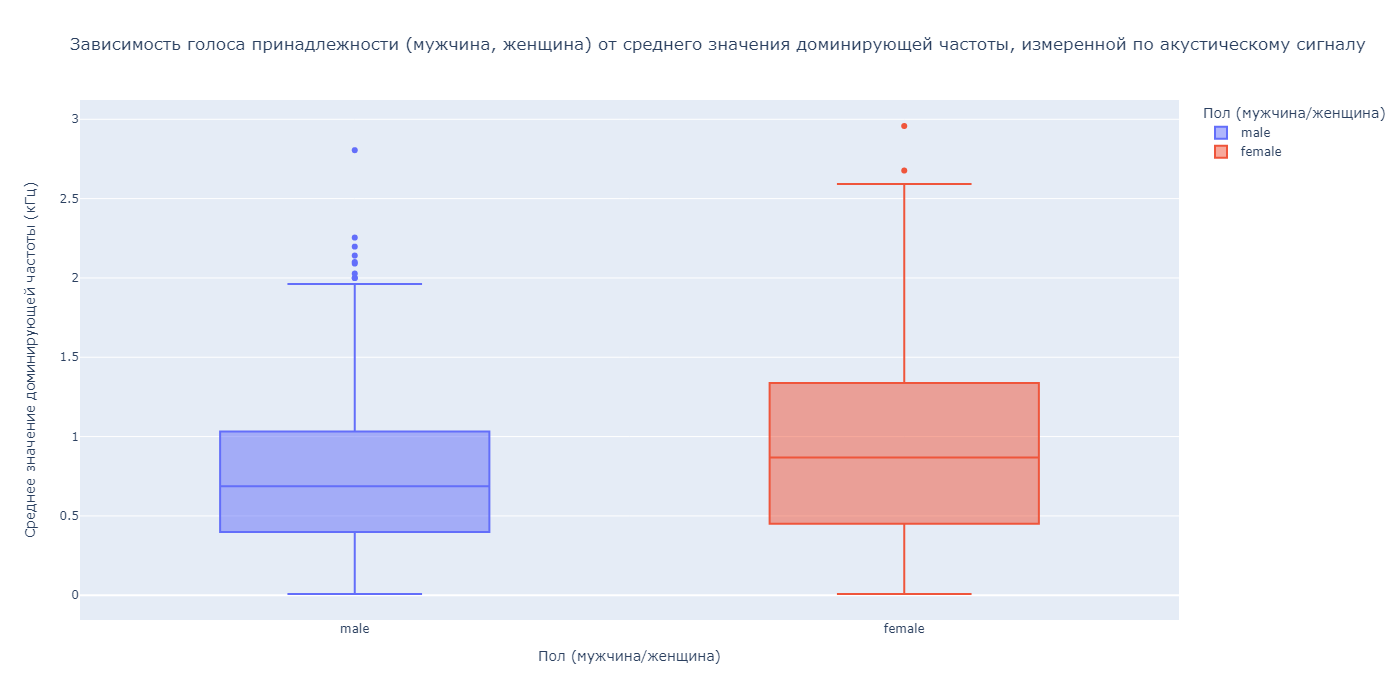

Среднее значение доминирующей частоты, измеренной по акустическому сигналу у мужчин: 0.729 кГц
Среднее значение доминирующей частоты, измеренной по акустическому сигналу у женщин: 0.930 кГц


In [8]:
# Строим коробчатую диаграмму
fig = px.box(
    data_frame = voice_df,
    x = 'label',
    y = 'meandom',
    color = 'label',
    height = 700,
    width = 1400,
    orientation = 'v',
    
    labels = {
        'label': 'Пол (мужчина/женщина)',
        'meandom': 'Среднее значение доминирующей частоты (кГц)'
    },
    
    title = 'Зависимость голоса принадлежности (мужчина, женщина) от среднего значения доминирующей частоты, измеренной по акустическому сигналу'
)

# Выводим график
fig.show('png')


# Выведем значения 
meandom_group = voice_df.groupby(
    by = 'label',
    as_index = False
)[['meandom']].mean()

print('Среднее значение доминирующей частоты, измеренной по акустическому сигналу у мужчин: {:.3f} кГц'.format(meandom_group.meandom[1]))
print('Среднее значение доминирующей частоты, измеренной по акустическому сигналу у женщин: {:.3f} кГц'.format(meandom_group.meandom[0]))

#### $3.5$

Построим зависимость голоса принадлежности (мужчина, женщина) от среднего значения основной частоты, измеренной по акустическому сигналу.

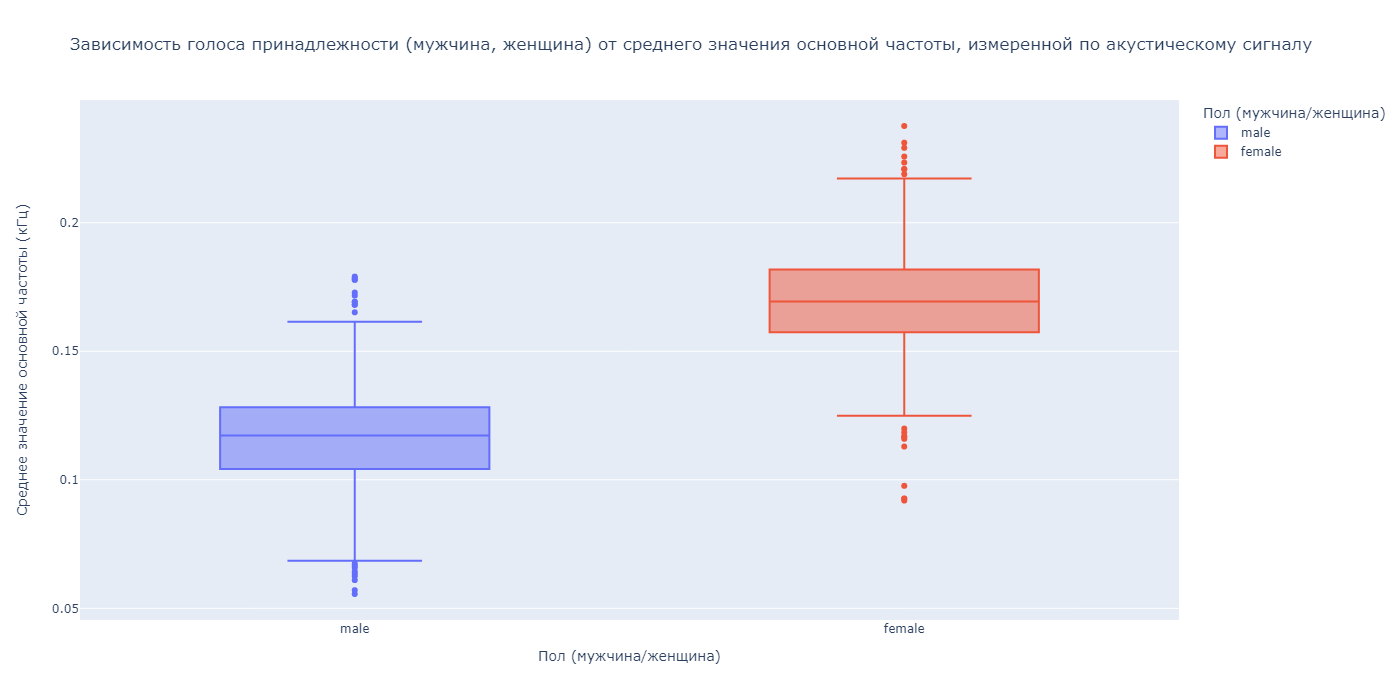

Среднее значение основной частоты, измеренной по акустическому сигналу у мужчин: 0.116 кГц
Среднее значение основной частоты, измеренной по акустическому сигналу у женщин: 0.170 кГц


In [9]:
# Строим коробчатую диаграмму
fig = px.box(
    data_frame = voice_df,
    x = 'label',
    y = 'meanfun',
    color = 'label',
    height = 700,
    width = 1400,
    orientation = 'v',
    
    labels = {
        'label': 'Пол (мужчина/женщина)',
        'meanfun': 'Среднее значение основной частоты (кГц)'
    },
    
    title = 'Зависимость голоса принадлежности (мужчина, женщина) от среднего значения основной частоты, измеренной по акустическому сигналу'
)

# Выводим график
fig.show('png')


# Выведем значения 
meanfun_group = voice_df.groupby(
    by = 'label',
    as_index = False
)[['meanfun']].mean()

print('Среднее значение основной частоты, измеренной по акустическому сигналу у мужчин: {:.3f} кГц'.format(meanfun_group.meanfun[1]))
print('Среднее значение основной частоты, измеренной по акустическому сигналу у женщин: {:.3f} кГц'.format(meanfun_group.meanfun[0]))

#### **Вывод:**

По построенным графикам можно заключить, что по всем параметрам голос женщини имеет более высокие значения, чем голос мужчин.

## <center> **`4.` Построение и сравнение моделей (Machine Learning)**

#### $3.1$

Разделим датасет на две части в соотношении 80/20:

In [32]:
# Разделим данные на матрицу наблюдений и вектор правильных ответов
X = voice_df.drop('label', axis = 1)
y = voice_df.label


# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


Дополнительная предобработка данных нам не потребуется, поэтому мы можем смело перейти к построению моделей. Для моделирования мы будем использовать модели «древесного» типа.

#### $3.2$

Начнём с решающего пня.

Создадим модель дерева решений максимальной глубины 1. В качестве критерия информативности используем энтропию Шеннона.

Обучим модель на тренировочной выборке и визуализируем её в виде графа.

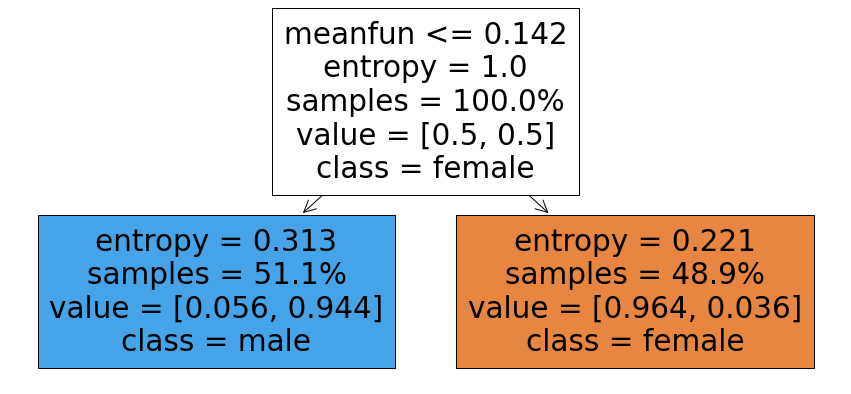

In [33]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth = 1,         # максимальная глубина
    criterion = 'entropy'  # критерий информативности
)

# Обучаем модель на тренировочной выборке
dt.fit(X_train, y_train)


# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (15, 7))
tree_graph = tree.plot_tree(
    decision_tree = dt,         # дерево
    feature_names = X.columns,  # имена факторов
    proportion = True,          # выводить ли количество данных в пропорциях
    filled = True,              # расцветка
    class_names = dt.classes_   # имена классов
);

Сделаем предсказание и рассчитаем значение метрики *accuracy* на тестовой выборке. Ответ **округлим до трёх знаков после точки-разделителя**.

In [34]:
# Делаем предсказание
y_test_pred = dt.predict(X_test)

# Считаем метрику accuracy на тестовой выборке
print('Метрика accuracy на тестовой выборке: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Метрика accuracy на тестовой выборке: 0.956


#### $3.3$

Увеличим глубину дерева.

Создадим дерево решений с максимальной глубиной 2. В качестве критерия информативности используем энтропию Шеннона.

Обучим модель на тренировочной выборке и визуализируем её в виде графа.

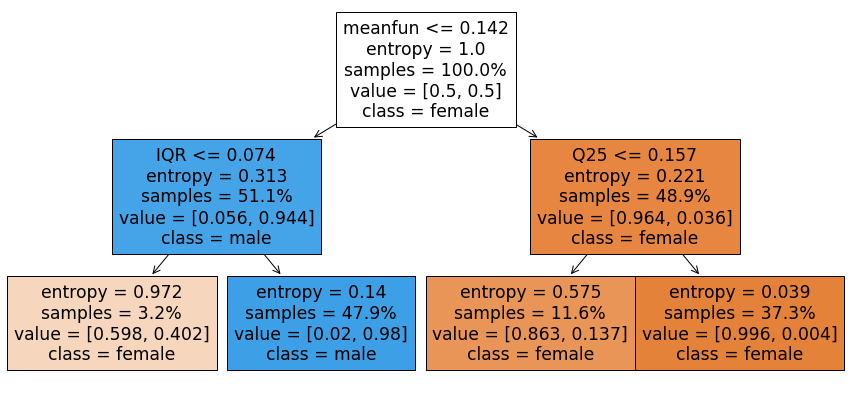

In [35]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth = 2,         # максимальная глубина
    criterion = 'entropy'  # критерий информативности
)

# Обучаем модель на тренировочной выборке
dt.fit(X_train, y_train)


# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (15, 7))
tree_graph = tree.plot_tree(
    decision_tree = dt,         # дерево
    feature_names = X.columns,  # имена факторов
    proportion = True,          # выводить ли количество данных в пропорциях
    filled = True,              # расцветка
    class_names = dt.classes_   # имена классов
);

Сделаем предсказание и рассчитаем значение метрики *accuracy* на тестовой выборке. Ответ **округлим до трёх знаков после точки-разделителя**.

In [36]:
# Делаем предсказание
y_test_pred = dt.predict(X_test)

# Считаем метрику accuracy на тестовой выборке
print('Метрика accuracy на тестовой выборке: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Метрика accuracy на тестовой выборке: 0.962


#### $3.4$

Создадим дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра `random_state` возьмите 0.

Обучим модель на тренировочной выборке.

Глубина полученного дерева решения: 12
Количество листьев в полученном дереве решений: 54


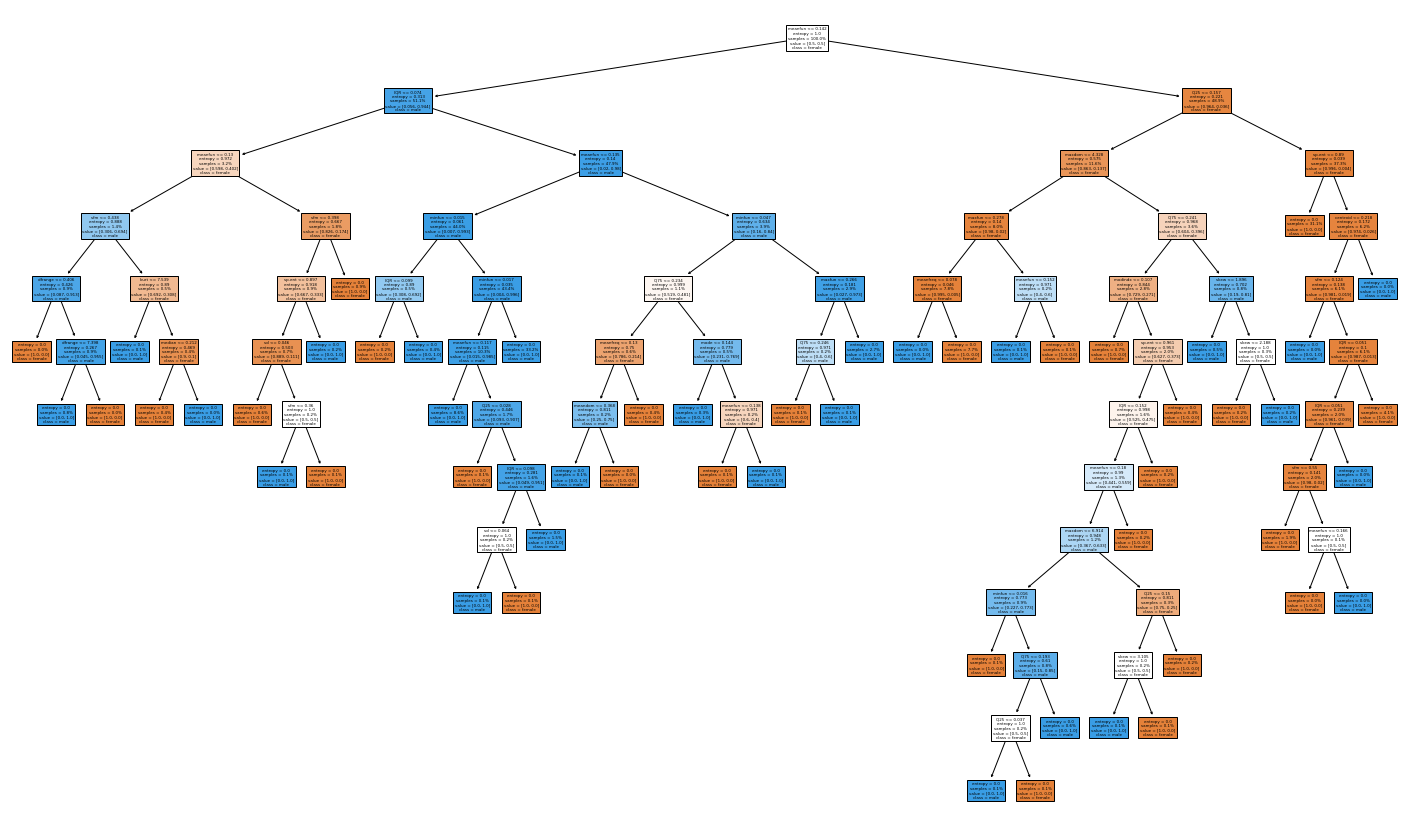

In [42]:
# Инициализируем модель дерева решений с глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    criterion = 'entropy',  # критерий информативности
    random_state = 0        # генератор случайных чисел
)

# Обучаем модель на тренировочной выборке
dt.fit(X_train, y_train)


# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize = (25, 15))
tree_graph = tree.plot_tree(
    decision_tree = dt,         # дерево
    feature_names = X.columns,  # имена факторов
    proportion = True,          # выводить ли количество данных в пропорциях
    filled = True,              # расцветка
    class_names = dt.classes_   # имена классов
);


# Выведем глубину полученного дерева решения
print(f'Глубина полученного дерева решения: {dt.get_depth()}')

# Выведем количество листьев в полученном дереве решений
print(f'Количество листьев в полученном дереве решений: {dt.get_n_leaves()}')

Сделаем предсказание и рассчитаем значение метрики *accuracy* для обучающей и тестовой выборок. Ответы **округлим до трёх знаков после точки-разделителя**.

In [45]:
# Делаем предсказание
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Считаем метрику accuracy на обучающей выборке
print('Метрика accuracy на обучающей выборке: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

# Считаем метрику accuracy на тестовой выборке
print('Метрика accuracy на тестовой выборке: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Метрика accuracy на обучающей выборке: 1.000
Метрика accuracy на тестовой выборке: 0.973


#### $3.5$

Попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (*Grid SearchCV*).

In [46]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'],    # критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], # максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10]   # минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать *k-fold*-валидатор со стратификацией (*StratifiedKFold*):

In [47]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits = 5)

С помощью *Grid SearchCV* из модуля *model_selection* библиотеки *sklearn* переберём гиперпараметры дерева решений из приведённой сетки на обучающей выборке и найдём оптимальные. Параметр `random_state` для дерева решений установим равным 0. В качестве метрики качества (параметр `scoring`) используем *accuracy*.

In [50]:
# Инициализируем поиск на сетке и обучаем его
grid_search_tree = model_selection.GridSearchCV(
    
    estimator = tree.DecisionTreeClassifier(random_state = 0), # модель
    param_grid = param_grid,                                   # сетка параметров
    scoring = 'accuracy',                                      # метрика
    cv = cv,                                                   # кросс-валидатор
    n_jobs = -1                                                # используем все мощности процессора
    
)

# Обучаем модель
grid_search_tree.fit(X_train, y_train)
print('Наилучшие значения гиперпараметров: {}'.format(grid_search_tree.best_params_))

Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


С помощью наилучшей модели сделаем предсказание для обучающей и тестовой выборок. Рассчитаем значение метрики *accuracy* на каждой из выборок. Ответы **округлим до трёх знаков после точки-разделителя**.

In [51]:
# Определяем наилучшую модель
best_model = grid_search_tree.best_estimator_

# Делаем предсказание
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Считаем метрику accuracy на обучающей и тестовой выборках
print('Метрика accuracy на обучающем наборе: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Метрика accuracy на тестовом наборе: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Метрика accuracy на обучающем наборе: 0.996
Метрика accuracy на тестовом наборе: 0.970


#### $3.6$

Для оптимального дерева решений найдём важность каждого из факторов. Визуализируем её в виде столбчатой диаграммы.

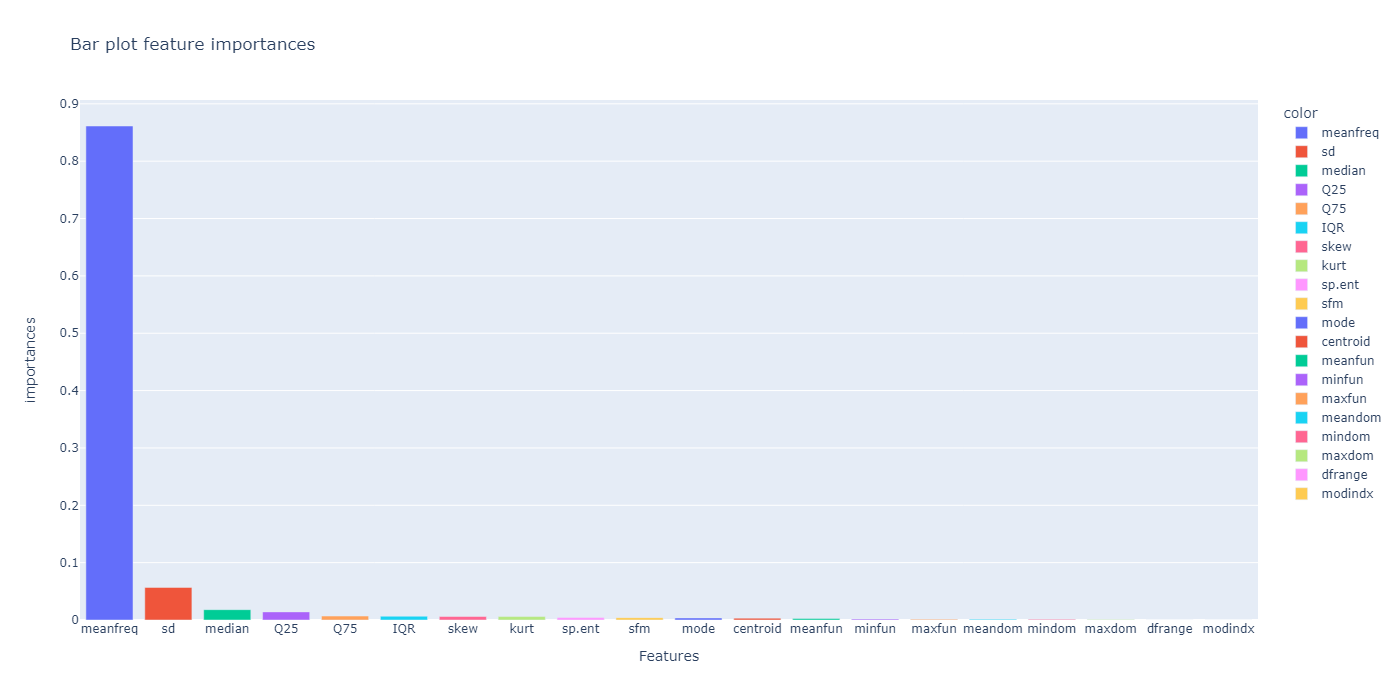

In [58]:
# Выделяем наиболее важные признаки
features = X.columns                                   # признаки
feature_importances = best_model.feature_importances_  # важность признаков



# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({
    'features': features,
    'importances': feature_importances
})

importances_data = importances_data.sort_values(by='importances', ascending=False)



# Строим столбчатую диаграмму
fig = px.bar(
    data_frame = importances_data,  
    x = features,
    y = 'importances',
    color = features,
    orientation = 'v',
    height = 700,
    width = 1400,
    
    labels = {
        'x': 'Features',
        'y': 'Importance'
    },
    
    title = 'Bar plot feature importances'
)

fig.show('png')

## <center> **Вывод**

По окончании обработки данных, построения и тестирования различных моделей наилучший результат показала модель решающее дерево (значение метрики **accuracy** на обучающем и тестовом наборе равны: `0.996` и `0.970` соответственно).